<a href="https://colab.research.google.com/github/jaclynchiu7/Classifying-News-Article/blob/main/end_to_end_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'personal_projects/News_Article'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


# Loading Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import sklearn
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [3]:
df = pd.read_csv('drive/MyDrive/personal_projects/News_Article/classification_articles.csv')

In [4]:
df

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports
...,...,...,...,...,...,...,...,...
3145,'By Rachel Premack of FreightWaves\n\nYou prob...,'Right now the barge industry — and all of us ...,"['coal', 'traffic', 'right', 'mississippi', 's...",NaN,['Tyler Durden'],https://www.zerohedge.com/markets/latest-suppl...,drought,climate
3146,'Manufacturing had a big summer. The CHIPS and...,'To address these issues and drive the transit...,"['manufacturing', 'system', 'future', 'technol...",NaN,['Mary Beth Gallagher'],https://news.mit.edu/2022/manufacturing-cleane...,drought,climate
3147,"'A golf cart on a path at Verrado, an 8,800-ac...",'Water flow has dropped precipitously in the C...,"['developers', 'live', 'state', 'development',...",NaN,['Keith Schneider'],https://news.yahoo.com/thousands-live-one-day-...,drought,climate
3148,"'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...","'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...","['rohingyas', 'told', 'indonesia', 'refugees',...",NaN,['Online News Editor'],https://www.laprensalatina.com/dozens-of-rohin...,drought,climate


In [5]:
# split training and testing data 
train, test = train_test_split(df[['full_text', 'root_label']], test_size=0.2)
train.shape, test.shape

((2520, 2), (630, 2))

* training data size: 2520
* test data size: 630


# Feature Extraction 

In [6]:
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from string import punctuation
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Combine stopwords
stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# clean full text column of data
from extra import clean

train['full_text'] = [clean(sample_train_text) for sample_train_text in train['full_text']]
test['full_text'] = [clean(sample_test_text) for sample_test_text in test['full_text']]

In [8]:

#Lemmanizer
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

wnl = nltk.wordnet.WordNetLemmatizer()
  
def lemmatize_sent(list_word): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in nltk.pos_tag(list_word)]
def lemmanized_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())


#Stemming 
stemmer = nltk.stem.PorterStemmer()
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(list_word):
     return (stemmer.stem(word) for word in list_word)

def stemmer_rmv_punc(doc):
    return (word for word in stemmed_words(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())




In [9]:
vectorizer = CountVectorizer(stop_words = 'english', min_df = 3, analyzer = lemmanized_rmv_punc)
X_train_counts = vectorizer.fit_transform(train['full_text'])
X_test_counts = vectorizer.transform(test['full_text'])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [10]:
X_train_tfidf.shape, X_test_tfidf.shape

((2520, 13632), (630, 13632))

# Dimensionality Reduction 

In [11]:
# NMF
from sklearn.decomposition import NMF

model = NMF(n_components=50, init = 'random', random_state = 0, max_iter=500)
W = model.fit_transform(X_train_tfidf)
H = model.components_
WH = W @ H 
np.linalg.norm(X_train_tfidf - WH)

41.18402352152928

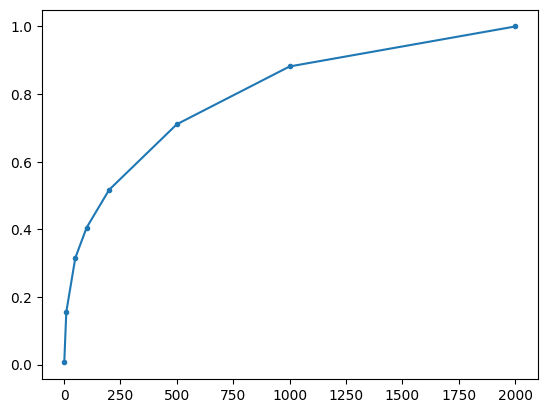

In [ ]:
# LSI
from sklearn.decomposition import TruncatedSVD

num_topics = [1, 10, 50, 100, 200, 500, 1000, 2000]
svd_explained_variance_ratio = {}

for topic in num_topics:
  svd = TruncatedSVD(n_components=topic, n_iter=7, random_state=42)
  svd.fit_transform(X_train_tfidf)
  svd_explained_variance_ratio[topic] = svd.explained_variance_ratio_.sum()

data = pd.DataFrame.from_dict(svd_explained_variance_ratio, orient = 'index')
data.reset_index(inplace=True)
data.columns = ['topics', 'explained variance ratio']
plt.plot(data['topics'], data['explained variance ratio'], '.-')

In [12]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
USIG = svd.fit_transform(X_train_tfidf)
V = svd.components_
USV = USIG @ V
np.linalg.norm(X_train_tfidf - USV)

40.847549906248155

LSI reconstruction error is smaller than using NMF

In [13]:
X_train_LSI = USIG
X_test_LSI = svd.transform(X_test_tfidf)

# Classification Algorithms 

In [14]:
# relabeling
# climate is 1, sports is 0
train["root_label"] = train["root_label"].eq('climate').mul(1)
test["root_label"] = test["root_label"].eq('climate').mul(1)

# metrics function
def metrics_conf(conf_matrix):
  print(conf_matrix)

  total = np.sum(conf_matrix)
  true_positive = conf_matrix[0][0]
  false_positive = conf_matrix[0][1]
  false_negative = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # accuracy 
  accuracy= (true_positive + true_negative)/total
  print("Accuracy:", accuracy)
  # recall
  recall = true_positive/(true_positive + false_negative)
  print("Recall:", recall)

  # precision
  precision = true_positive/(true_positive + false_positive)
  print("Precision:" , precision)
  # F-1 score
  f1 =  2 * (precision * recall) / (precision + recall)
  print("F1:", f1)

### Support Vector Machines

In [15]:
from sklearn.svm import SVC

soft_margin = SVC(kernel = 'linear', C = 0.0001)
hard_margin = SVC(kernel = 'linear', C = 1000)

soft_margin.fit(X_train_LSI, train["root_label"])
hard_margin.fit(X_train_LSI, train["root_label"])

predict_soft_margin = soft_margin.predict(X_test_LSI)
predict_hard_margin = hard_margin.predict(X_test_LSI)

decision_function_soft_margin = soft_margin.decision_function(X_test_LSI)
decision_function_hard_margin = hard_margin.decision_function(X_test_LSI)

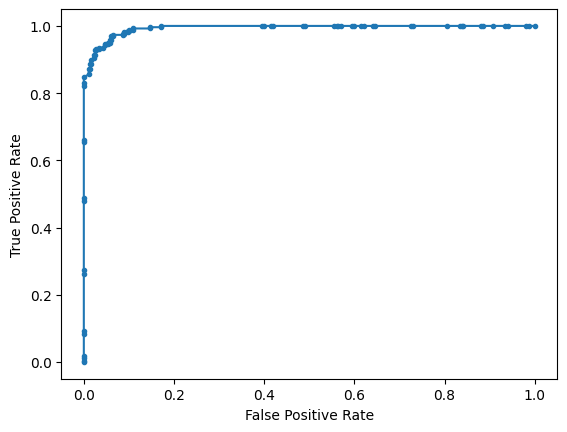

[[367   0]
 [263   0]]
Accuracy: 0.5825396825396826
Recall: 0.5825396825396826
Precision: 1.0
F1: 0.7362086258776329


In [16]:
# Soft Margin metrics 
from sklearn import metrics 

conf_matrix_soft = metrics.confusion_matrix(test["root_label"], predict_soft_margin)
fpr, tpr, thresholds = metrics.roc_curve(test["root_label"], decision_function_soft_margin)
plt.plot(fpr, tpr, '.-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

metrics_conf(conf_matrix_soft)

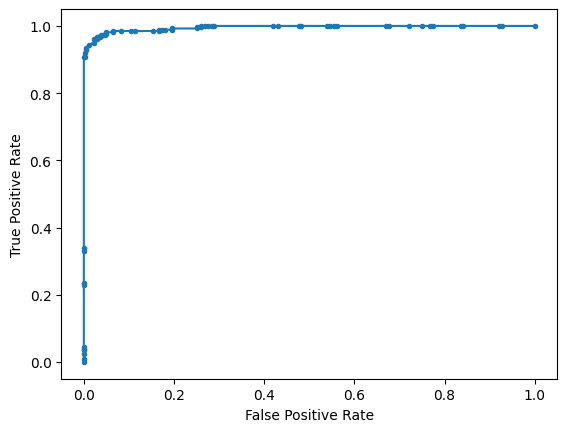

[[350  17]
 [  6 257]]
Accuracy: 0.9634920634920635
Recall: 0.9831460674157303
Precision: 0.9536784741144414
F1: 0.9681881051175657


In [17]:
# Hard Margin metrics
conf_matrix_hard = metrics.confusion_matrix(test["root_label"], predict_hard_margin)

fpr, tpr, thresholds = metrics.roc_curve(test["root_label"], decision_function_hard_margin)
plt.plot(fpr,tpr, '.-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

metrics_conf(conf_matrix_hard)

## LogisticRegression
from sklearn.linear_model import LogisticRegression



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


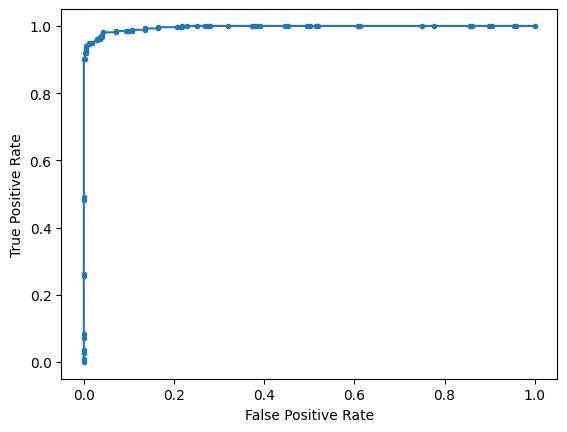

[[349  18]
 [  5 258]]
Accuracy: 0.9634920634920635
Recall: 0.9858757062146892
Precision: 0.9509536784741145
F1: 0.9680998613037448


In [18]:
from sklearn.linear_model import LogisticRegression

# no Regularization 
no_reg = LogisticRegression(penalty = 'none', max_iter = 1000).fit(X_train_LSI, train["root_label"])
predict_no_reg = no_reg.predict(X_test_LSI)
lp_no_reg = no_reg.predict_log_proba(X_test_LSI)

conf_matrix_no_reg = metrics.confusion_matrix(test["root_label"], predict_no_reg)

fpr, tpr, thresholds = metrics.roc_curve(test["root_label"], lp_no_reg[:, 1])
plt.plot(fpr,tpr, '.-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

metrics_conf(conf_matrix_no_reg)

In [19]:
# 5 fold validation for regularization l1 and l2  
from sklearn.model_selection import cross_val_score
np.random.seed(42)
random.seed(42)

strengths = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0 ,1e1, 1e2, 1e3, 1e4, 1e5]
results1 = {}
results2 = {}

#l1 validation 
for strength in strengths:
  model = LogisticRegression(penalty = 'l1', C = strength, solver = 'liblinear', max_iter = 1000)
  scores = cross_val_score(model, X_train_LSI, train["root_label"])
  avg_score = sum(scores)/len(scores)
  results1[strength] = avg_score

#l2 validation
for strength in strengths:
  model = LogisticRegression(penalty = 'l2', C = strength, solver = 'lbfgs', max_iter = 1000)
  scores = cross_val_score(model, X_train_LSI, train["root_label"])
  avg_score = sum(scores)/len(scores)
  results2[strength] = avg_score

best_strength_l1 = max(results1, key = results1.get) # gamma = 100
best_strength_l2 = max(results2, key = results2.get) # gamma = 1000

print(best_strength_l1, best_strength_l2)

100.0 1000.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


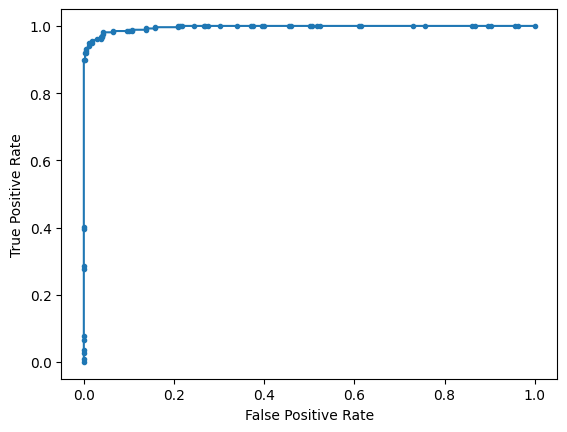

[[350  17]
 [  5 258]]
Accuracy: 0.9650793650793651
Recall: 0.9859154929577465
Precision: 0.9536784741144414
F1: 0.9695290858725761


In [21]:
# best L1 regulation
l1_reg = LogisticRegression(penalty = 'l1', C = best_strength_l1, solver = 'liblinear', max_iter = 1000)
l1_reg.fit(X_train_LSI, train["root_label"])
predict_l1_reg = l1_reg.predict(X_test_LSI)
lp_l1_reg = l1_reg.predict_log_proba(X_test_LSI)

conf_matrix_l1_reg = metrics.confusion_matrix(test["root_label"], predict_l1_reg)

fpr, tpr, thresholds = metrics.roc_curve(test["root_label"], lp_l1_reg[:, 1])
plt.plot(fpr, tpr, '.-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

metrics_conf(conf_matrix_l1_reg)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


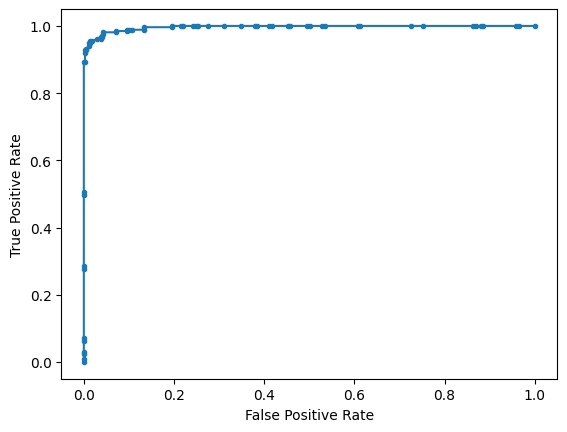

[[350  17]
 [  5 258]]
Accuracy: 0.9650793650793651
Recall: 0.9859154929577465
Precision: 0.9536784741144414
F1: 0.9695290858725761


In [22]:
# best L2 regulation 
l2_reg = LogisticRegression(penalty = 'l2', C = best_strength_l2, solver = 'lbfgs', max_iter = 1000).fit(X_train_LSI, train["root_label"])
predict_l2_reg = l2_reg.predict(X_test_LSI)
lp_l2_reg = l2_reg.predict_log_proba(X_test_LSI)

conf_matrix_l2_reg = metrics.confusion_matrix(test["root_label"], predict_l2_reg)

fpr, tpr, thresholds = metrics.roc_curve(test["root_label"], lp_l2_reg[:, 1])
plt.plot(fpr, tpr, '.-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

metrics_conf(conf_matrix_l2_reg)

## Naive Bayes Classifier

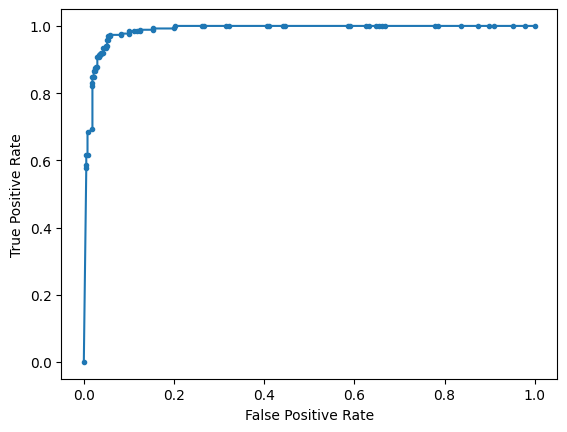

[[330  37]
 [  5 258]]
Accuracy: 0.9333333333333333
Recall: 0.9850746268656716
Precision: 0.8991825613079019
F1: 0.9401709401709402


In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_LSI, train["root_label"])
predict_gnb = gnb.predict(X_test_LSI)
lp_gnb = gnb.predict_log_proba(X_test_LSI)

conf_matrix_gnb = metrics.confusion_matrix(test["root_label"], predict_gnb)

fpr, tpr, thresholds = metrics.roc_curve(test["root_label"], lp_gnb[:, 1])
plt.plot(fpr, tpr, '.-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

metrics_conf(conf_matrix_gnb)

# GridSearch Pipeline 

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp
from shutil import rmtree
import joblib
from joblib import Memory
location = './cachedir2'
memory_ = Memory(location, verbose=0)

In [27]:

import warnings
    
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')
pipe = Pipeline(
    [
        ("vect", CountVectorizer(min_df=3, stop_words = 'english', analyzer = lemmanized_rmv_punc)),
        ("tfidf", TfidfTransformer()),
        ("dim_reduction", TruncatedSVD(n_components= 50, random_state=42)),
        ("classifer", GaussianNB())
    ],
    memory = memory_
)

param_grid = {
    "vect__min_df" : [3,5], 
    "vect__analyzer" :[lemmanized_rmv_punc, stemmer_rmv_punc],
    "dim_reduction" : [TruncatedSVD(n_components= 30, random_state=42),
                       TruncatedSVD(n_components= 5, random_state=42),
                       TruncatedSVD(n_components= 80, random_state=42),
                       NMF(n_components=30, init = 'random', max_iter = 1000),
                       NMF(n_components=5, init = 'random', max_iter = 1000),
                       NMF(n_components=80, init = 'random', max_iter = 1000)
                       ], 
    "classifer" : [GaussianNB(),
                   LogisticRegression(penalty = 'l1', C = 100, solver = 'liblinear', max_iter = 1000),
                   LogisticRegression(penalty = 'l2', C = 1000, solver = 'lbfgs', max_iter = 1000),
                   SVC(kernel = 'linear', C = 1000)
                   ]
}

search = GridSearchCV(pipe, param_grid, n_jobs=1, cv=5)
search.fit(train["full_text"], train["root_label"])
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.961):
{'classifer': LogisticRegression(C=1000, max_iter=1000), 'dim_reduction': TruncatedSVD(n_components=80, random_state=42), 'vect__analyzer': <function lemmanized_rmv_punc at 0x7f09229a8820>, 'vect__min_df': 5}


## Best Models and Accuracies

In [28]:
# Top 5 Models
results = pd.DataFrame.from_dict(search.cv_results_)
results = results[['params', 'mean_test_score']]
sorted = results.sort_values(by = "mean_test_score", ascending = False)
pd.options.display.max_colwidth = 300
print(sorted.head(5))

memory_.clear(warn=False)

                                                                                                                                                                                                                                               params  \
57                                   {'classifer': LogisticRegression(C=1000, max_iter=1000), 'dim_reduction': TruncatedSVD(n_components=80, random_state=42), 'vect__analyzer': <function lemmanized_rmv_punc at 0x7f09229a8820>, 'vect__min_df': 5}   
33  {'classifer': LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='liblinear'), 'dim_reduction': TruncatedSVD(n_components=80, random_state=42), 'vect__analyzer': <function lemmanized_rmv_punc at 0x7f09229a8820>, 'vect__min_df': 5}   
95                                               {'classifer': SVC(C=1000, kernel='linear'), 'dim_reduction': NMF(init='random', max_iter=1000, n_components=80), 'vect__analyzer': <function stemmer_rmv_punc at 0x7f09229a8c10>, 'vect__min_df': 5}   
56  